# K-Armed Bandit Experiments Part 2

**TLDR** 

**Optimistic Greedy**

In the previous section we experimented on Greedy and $\epsilon$-Greedy...

**Upper-Confidence Bound Action Selection**

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from scripts.k_armbed_bandit.functions import *

import warnings
warnings.filterwarnings("ignore")

## Experiments

We summarize below our experiment parameters. There are `k_arms` arms or distributions of rewards. Each game has `steps` timesteps. For our analysis we run `n_trials` trials or independent runs of the game, the results of which we average. The standard deviation for sampling how much we change the means of the K reward distributions for the non-stationary problem is some value `q_delta_std`.

In [2]:
k_arms = 10 # number of levers / arms
steps = 1000 # count steps in an episode
n_trials = 500 # number of independent runs/trials
q_delta_std = 0.1 # standard deviation of the Gaussian used for random walk on the true q() values

### Optimistic Greedy

#### Stationary Problem
Below is an example of K randomly generated distributions of rewards for the K-armed bandit problem with fixed reward distributions.

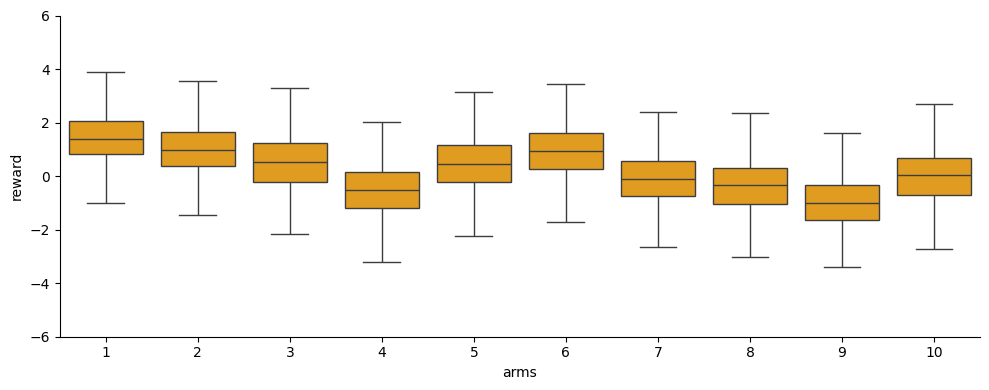

In [3]:
def animate(iter):
    global q_mu

    # plot
    ax.clear()
    ax.set_xticks(range(k_arms), range(1, k_arms+1))
    ax.set_xlabel("arms")
    ax.set_ylabel("reward")
    ax.set_ylim(-6, 6)
    # ax.set_title(f"Iter {iter}")
    
    viz_r_dist(k_arms, q_mu, N=1000, ax=ax)
    sns.despine()    
    plt.tight_layout()

    # random walk
    q_mu = random_walk_q(q_mu, std=q_delta_std)    
    
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
q_mu = init_q(k=k_arms, std=1)    
animate(1)

For this stationary reward problem, we show to the left below the average reward over timesteps for the different algorithms. Here `eps=0` means Greedy, and `eps=0.1` means Epsilon-Greedy. `step_size = 1/N` means the algorithm uses sample-averaging, while `step_size = 0.1` means the algorithm uses weighted averaging with $\alpha = 0.1$ 

To the right, we show the proportion among all trials that the optimal action (corresponding to the highest true expected return $q(a)$) was selected.

**Observations**
* Best performers


* Worst performers

**Questions (I don't know the answers to yet)**

(4, 1.2282247456226814) (4, 1.304561592891262) (4, -2.673259189779359) (4, 0.3692878503147954) (4, -0.4851973428091126)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0. 0. 0. 0. 0.]]
[[-5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.        ]
 [-5.         -5.         -5.         -5.         -4.37717753 -5.
  -5.         -5.         -5.         -5.        ]
 [-5.         -5.         -5.         -5.         -3.80900361 -5.
  -5.         -5.         -5.         -5.        ]
 [-5.         -5.         -5.         -5.         -3.69542917 -5.
  -5.         -5.         -5.         -5.        ]
 [-5.         -5.         -5.         -5.         -3.28895747 -5.
  -5.         -5.         -5.         -5.        ]]


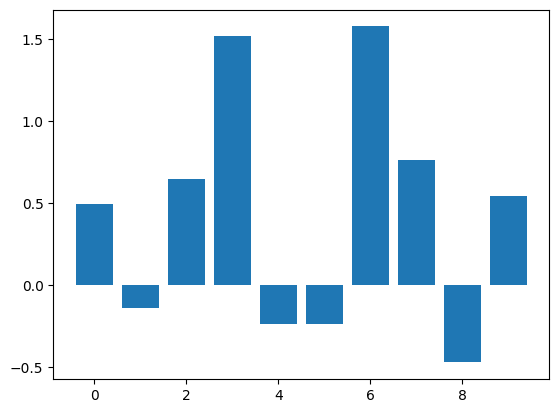

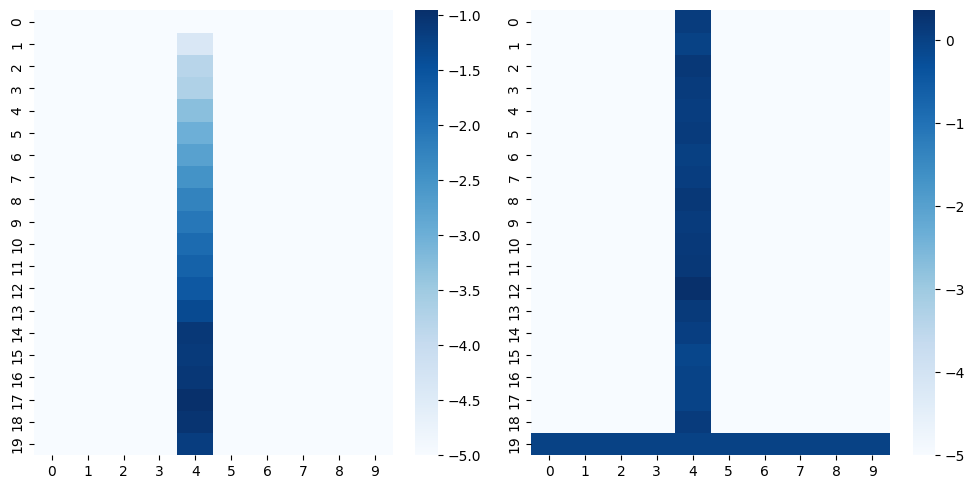

In [4]:
# debug
Q_init = [-5] * k_arms
stationary_q = True
step_size = 0.1
trial = 42

bandit = Bandit(k_arms, eps=0.,
                Q_init=Q_init,
                stationary_q=stationary_q, 
                q_delta_std=q_delta_std,
                steps=steps, step_size=step_size,
                random_seed=trial,
                )
bandit.run_bandit()


# investigate
plt.bar(range(len(bandit.q_mu)), bandit.q_mu)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(bandit.Q_tracker[:20], cmap='Blues', ax=axs[0])
sns.heatmap(bandit.Q_tracker[-20:], cmap='Blues', ax=axs[1])
plt.tight_layout()

print(*zip(bandit.A_tracker, bandit.R_tracker[:5]))
print(bandit.N_tracker[:5])
print(bandit.Q_tracker[:5])

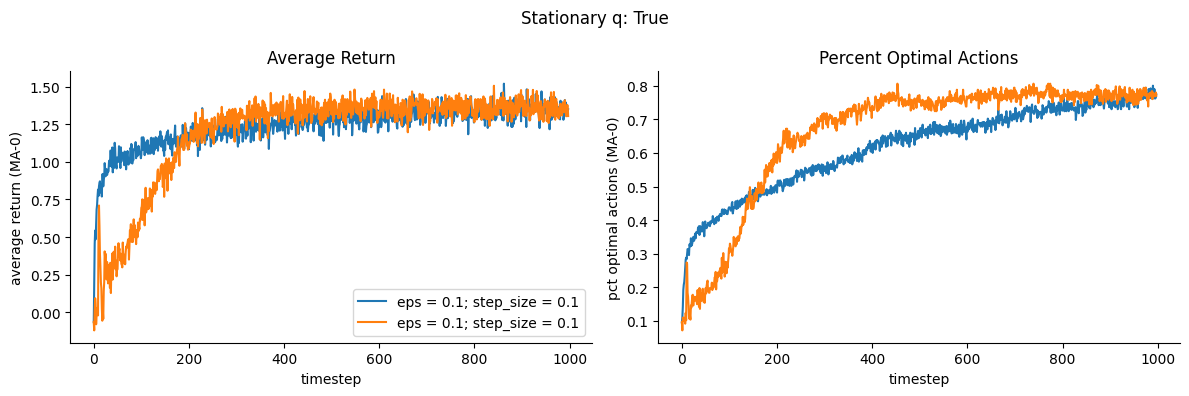

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=False)    

w = 0
stationary_q = True
Q_init_vals = [[0] * k_arms, [5] * k_arms]
step_sizes = [0.1] #["1/N", 0.1]
eps_list = [0.1]

for Q_init in Q_init_vals:
    for step_size in step_sizes:    
        for eps in eps_list:
            plot_learning_curves(stationary_q, Q_init, q_delta_std,
                                k_arms, n_trials, steps, step_size, eps, w, axs)

#### Non-Stationary Problem
We show in the animation below an example of K randomly generated distributions that gradually change means over the course of the game.

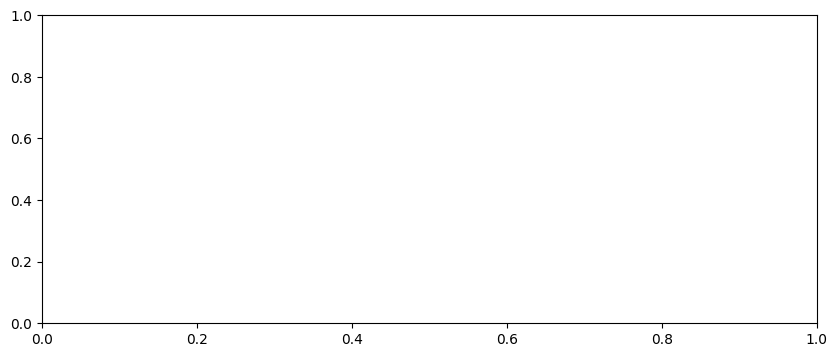

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

In [7]:
anim = animation.FuncAnimation(fig,
                               animate,
                               frames=100, 
                               interval=1)
HTML(anim.to_jshtml(fps=10))

<Figure size 640x480 with 0 Axes>

We show below the results for the stationary reward problem.

**Observations**
* Best performers
* Worst performers

**Questions (I don't know the answers to yet)**

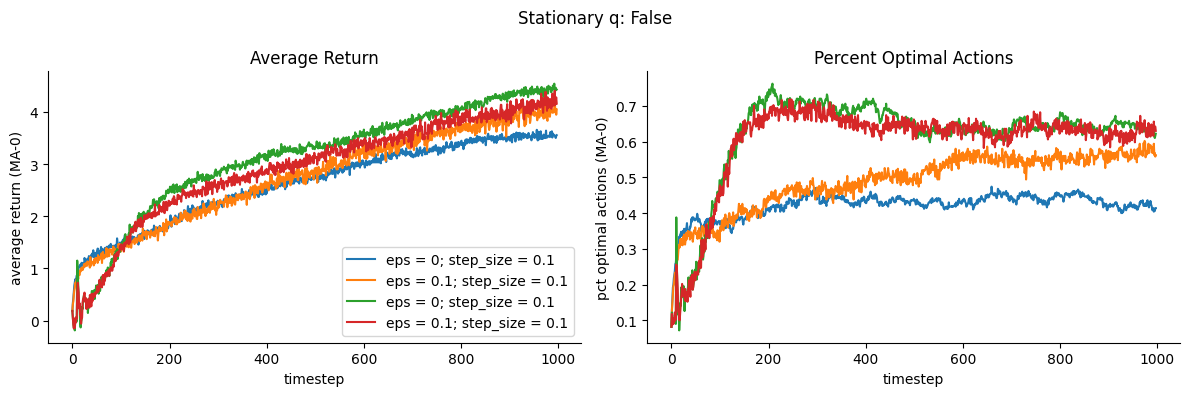

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=False)    

w = 0
stationary_q = False
Q_init_vals = [[0] * k_arms, [5] * k_arms]
step_sizes = [0.1] #["1/N", 0.1]
eps_list = [0, 0.1]

for Q_init in Q_init_vals:
    for step_size in step_sizes:    
        for eps in eps_list:
            plot_learning_curves(stationary_q, Q_init, q_delta_std,
                                k_arms, n_trials, steps, step_size, eps, w, axs)

### Upper-Confidence-Bound Action Selection